<h1 style="font-size=3rem;color:black;">Metody filtracji szumów i wykrywania krawędzi w obrazach OCT</h1>

# Rodzaje szumów
## 1. Szum plamkowy (speckle)
Ten rodzaj szumu występuje w obrazach uzyskanych przy użyciu technik wykorzystujących światło koherentne (lub częściowo koherentne). Jest spowodowany interferencją światła koherentnego rozproszonego na niedoskonałościach obrazowanej powierzchni. W wyniku interferencji kontruktywnej i destruktywnej powstają losowo rozmieszczone ciemne i jasne punkty [1].

![speckle](OCTspeckle.png)

(obraz OCT tęczówki oki - z kolekcji własnej)


## 2. Szum sól i pieprz
Powstaje na obrazach monochromatycznych i ma formę białych pikseli w ciemniejszych obszarach obrazu oraz czarnych pikseli w jaśniejszych obszarach. Ten rodzaj szumu może powstać przy konwersji obrazu z analagowego do cyfrowego [2].

![sól i pieprz](Noise_salt_and_pepper.png)

(Marko Meza, Image with salt and pepper noise; Public Domain https://upload.wikimedia.org/wikipedia/commons/f/f4/Noise_salt_and_pepper.png)


## 3. Szum Gaussa
Szum Gaussa to szum o normalnym rozkładzie funkcji gęstości prawdopodobieństw, tzn. wartości intensywności pikseli szumu należą do rozkładu Gaussa [3].

![Szum Gaussa](512x512-Gaussian-Noise.jpg)

(Me, Example of noise as a digital image, CC BY-SA 3.0 https://en.wikipedia.org/wiki/Gaussian_noise#/media/File:512x512-Gaussian-Noise.jpg)

# Wybrane metody filtracji szumów
Wykorzystane zostały wbudowane funkcje z pakietów cv2 (OpenCV) oraz scipy.ndimage.
## 1. Filtr medianowy
Filtr medianowy jest szczególnie użyteczny w usuwaniu szumu bez rozmycia krawędzi obiektów na obrazie. Zamienia wartość danego piksela na medianę wartości w obrębie okna filtra, przez co usunięcie szumu np. typu pieprz i sól jest możliwe, przy czym krawędzie obiektów nie ulegają rozmyciu, jak w przypadku innych filtrów, np. gaussowskiego lub uśredniającego. Poniżej są przedstawione przykładowe obrazy OCT przedniej komory oka kolejno przed i po zastosowaniu filtracji medianowej (maską o wymiarze 3x3).
 
![obraz przed](OCT.png)

![obraz po](median.png)



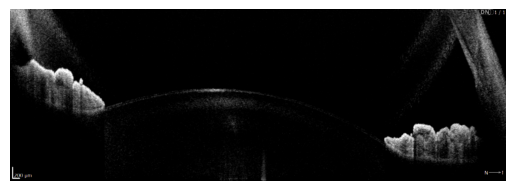

In [5]:
import cv2
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import scipy.ndimage as snd
import numpy as np

img = mpimg.imread(".venv/MetodyFiltracjiSzumów/OCT.png")
obraz = np.asarray(img)
obrazPoFiltracji = snd.median_filter(img,3) # szerokośc okna filtra: 3
plt.axis('off')
plt.imshow(obrazPoFiltracji)

## 2. Filtr uśredniający
Filtr uśredniający wygładza obraz tak samo bez względu na otoczenie filtrowanego piksela, tzn. uśrednienie ma taki sam efekt na tle obrazu jak i na krawędziach obiektów na obrazie. Poniżej przedstawiono przykładowy obraz OCT przedniej komory oka przed i po filtracji uśredniającej (maską o wymiarze 3x3). 

![obraz przed](OCT.png)

![obraz przed](mean.png)


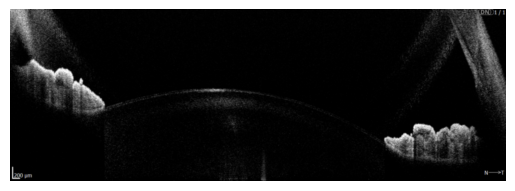

In [3]:
import cv2
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import scipy.ndimage as snd
import numpy as np

img = mpimg.imread(".venv/MetodyFiltracjiSzumów/OCT.png")
obraz = np.asarray(img)
obrazPoFiltracji = cv2.blur(img,(3,3)) # szerokośc okna filtra: 3
plt.axis('off')
plt.imshow(obrazPoFiltracji)

## 3. Filtr bilateralny
Filtr bilateralny pozwala na uśrednienie obrazu jak filtr Gaussa, aczkolwiek bierze pod uwagę wartości pikseli w otoczeniu filtrowanego piksela w celu minimalizacji uśrednienia w okolicy krawędzi [4]. Poniżej przedstawiono przykładowy obraz OCT przedniej komory oka przed i po filtracji bliateralnej (maską o wymiarze 3x3 i z odchyleniem standardowym rozkładu intensywności pikseli wynoszącym 75).

![obraz przed](OCT.png)

![obraz po](bilateral.png)

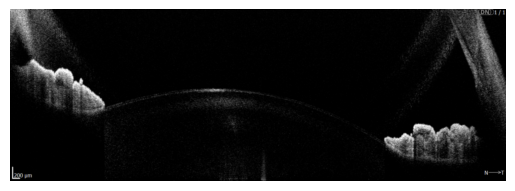

In [4]:
import cv2
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import scipy.ndimage as snd
import numpy as np

img = mpimg.imread(".venv/MetodyFiltracjiSzumów/OCT.png")
obraz = np.asarray(img)
obrazPoFiltracji = cv2.bilateralFilter(img,3,75,75) # szerokośc okna filtra: 3, ochylenie standardowe rozkładu intensywności pikseli: 75
plt.axis('off')
plt.imshow(obrazPoFiltracji)

# Wpływ filtracji na szum plamkowy na obrazie OCT
Szum plamkowy często uznaje się za lmitację obrazowania techniką OCT utrudniającą przetwarzanie i analizę obrazów [1], aczkolwiek z drugiej stron podjerzewa się, że szum plamkowy sam w sobie może nieść informacje istotne dla diagnostyki różnych schorzeń [5] [6]. Przy założeniu, że szum plamkowy niesie istotne informacje, odszumianie go może okazać się niekorzystne w analizie obrazu.

W celu sprawdzenia prezerwacji szumu plamkowego po zastosowaniu filtracji odszumiającej wykonano konwolucję obrazów z filtrem górnoprzepustowym Laplace'a, który ma na celu uwydatnienie szczegółów obrazu, tj. krawędzi oraz szumów. Poniżej przedstawione zostały wyniki konwolucji obrazów z filtrem Laplace'a w następującej kolejności: obraz oryginalny; po filtracji medianowej; po filtracji uśredniającej; po filtracji bilateralnej.

![oryginalny](laplacian con.png)

![oryginalny](laplacian con4.png)

![oryginalny](laplacian con5.png)

![oryginalny](laplacian con6.png)

Sprawdzone zostały wartości percentyla 99.9 każdego z 4 powyższych obrazów w celu sprawdzenia, który z obrazów po filtracji zachował największe podobieństwo do obrazu oryginalnego. Przedstawione poniżej wyniki wskazują na to, że filtracja medianowa pozwoliła na najlepsze zachowanie szumu plamkowego w obrębie struktur przedniej komory oka względem pozostałych filtrów - uśredniającego i bilateralnego o tym samym rozmiarze maski.

In [5]:
import cv2
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import scipy.ndimage as snd
import numpy as np

img = mpimg.imread(r"C:\Inżynieria Biomedyczna inż\Semestr 7\Praca inżynierska\Obrazy OCT\CO_06\CO_06_SZIA_20230615_111254_Anterior_B-skan_Szeroki_L_14mm_12032x1_scan1.png")

filtr = np.array([[0, 1, 0],
                  [1, -4, 1],
                  [0, 1, 0]])

obraz4 = cv2.bilateralFilter(img,3,75,75)
obraz5 = snd.median_filter(img,3)
obraz6 = cv2.blur(img,(3,3))

con = snd.convolve(img[:,:,1],filtr)
con4 = snd.convolve(obraz4[:,:,1],filtr)
con5 = snd.convolve(obraz5[:,:,1],filtr)
con6 = snd.convolve(obraz6[:,:,1],filtr)

print("obraz oryginalny - percentyl 99.9:")
print(np.percentile(con, 99.9))
print("obraz po filtracji bilateralnej - percentyl 99.9:")
print(np.percentile(con4, 99.9))
print("obraz po filtracji medianowej - percentyl 99.9:")
print(np.percentile(con5, 99.9))
print("obraz po filtracji uśredniającej - percentyl 99.9:")
print(np.percentile(con6, 99.9))

obraz oryginalny - percentyl 99.9:
0.6274510026574135
obraz po filtracji bilateralnej - percentyl 99.9:
0.24464670097828206
obraz po filtracji medianowej - percentyl 99.9:
0.3568667347135022
obraz po filtracji uśredniającej - percentyl 99.9:
0.16862745583057404


## Wybrane metody wykrywania krawędzi
# 1. Filtr Sobela
Filtr Sobela pozwala na wykrycie krawędzi obiektów na obrazie w ośmiu kierunkach (północnym, południowym, zachodnim, wschodnim oraz 4 diagonalnych). Ze względu na kształt i orientację tęczówki w przedniej komorze oka zdecydowano się na wykorzytsanie filtra północnego do wykrycia krawędzi przedniej powierzchni tęczówki. Poniżej przedstawiono przykładowy obraz OCT przedniej komory oka po wykryciu krawędzi filtrem Sobela.

![obraz po](sobel.png)

In [8]:
import matplotlib.image as mpimg
import scipy.ndimage as snd
import numpy as np

img = mpimg.imread(r"C:\Inżynieria Biomedyczna inż\Semestr 7\Praca inżynierska\Obrazy OCT\CO_06\CO_06_SZIA_20230615_111254_Anterior_B-skan_Szeroki_L_14mm_12032x1_scan1.png")

sobel = np.array([[1, 2, 1],
                  [0, 0, 0],
                  [-1, -2, -1]])

obraz1 = snd.convolve(img[:,:,1], sobel)

# 2. Filtr Prewitta
Filtr Prewitta ma identyczne zastosowanie co filtr Sobela, tzn. pozwala na wykrycie krawędzi obiektów na obrazie w zadanym kierunku, aczkolwiek jego macierz zawiera inne wartości względem macierzy filtra Sobela. Poniżej przedstawiono przykładowy obraz OCT przedniej komory oka po wykryciu krawędzi filtrem Prewitta.

![obraz po](prewitt.png)

In [12]:
import matplotlib.image as mpimg
import scipy.ndimage as snd
import numpy as np

img = mpimg.imread(r"C:\Inżynieria Biomedyczna inż\Semestr 7\Praca inżynierska\Obrazy OCT\CO_06\CO_06_SZIA_20230615_111254_Anterior_B-skan_Szeroki_L_14mm_12032x1_scan1.png")

prewitt = np.array([[1, 1, 1],
                  [0, 0, 0],
                  [-1, -1, -1]])

obraz2 = snd.convolve(img[:,:,1], prewitt)

# 3. Filtr Laplaca wykorzystujący pochodną Gaussa
Ten filtr pozwala na wykrycie wszystkich krawędzi bez względu na ich orientację na obrazie.

![obraz po](laplace.png)



In [11]:
import matplotlib.image as mpimg
import scipy.ndimage as snd

img = mpimg.imread(r"C:\Inżynieria Biomedyczna inż\Semestr 7\Praca inżynierska\Obrazy OCT\CO_06\CO_06_SZIA_20230615_111254_Anterior_B-skan_Szeroki_L_14mm_12032x1_scan1.png")

obraz3 = snd.gaussian_laplace(img, 0.5)

# Dyskusja i podsumowanie
Obraz OCT przedniej komory oka przedstawiony w niniejszym projekcie (razem z ponad 50 obrazami OCT innych oczu) został wykonany na potrzeby pracy inżynierskiej, której celem było zbadanie zależności pomiędzy topografią tęczówki a intensywnością światła przechodzącego przez rogówkę (w obrazowaniu Scheimpfluga). Z samych obrazów OCT zbierane były dane dotyczące długości profilu przedniej powierzchni tęczówki metodą ręczną - przy użyciu tabletu graficznego. Dla takiej metody pomiarowej najlepsze efekty wykrycia krawędzi tęczówki uzyskano przy zastosowaniiu filtra Laplace'a wykorzystującego pochodną Gaussa ze względu na cienkość i subtelność uzyskanych krawędzi. Cechy te ułatwiają precyzyjne zlokalizowanie krawędzi tęczówki i ręczne poprowadzenie krzywej po niej, co bez zastosowania filtracji jest trudniejsze, jako że tęczówka na obrazie OCT nie ma wyraźnie zarysowanej krawędzi - jest ona rozmyta. Prawdopodobnie w zastosowaniach automatycznych - przy obliczaniu długości przedniego profilu tęczówki przy użyciu skryptu - inny rodzaj filtracji okazałby się użyteczny, aczkolwiek w kontekście niniejszego projektu, który nie wykorzystywał takiego skryptu, nie da się określić liczbowo jakości wykrycia krawędzi.

Drugą informacją zbieraną z obrazów OCT na potrzeby pracy inżynierskiej była średnia intensywność pikseli w obrębie tęczówki (zbierane metodą ręczną poprzez zaznaczenie konturu tęczówki dookoła). Nie zastosowano wtedy żadnych metod filtrujących szumy w obrębie struktur oka. Praca wykazała, że istnieją statystycznie istotne różnice pomiędzy średnią intensywnością pikseli w obrębie tęczówek ciemnych (brązowe, czarne) i jasnych (niebieskie, szare), aczkolwiek szum plamkowy nie był w niej analizowany.

# Bibliografia
[1] M. Forouzanfar and H. Abrishami-Moghaddam, Ultrasound Speckle Reduction in the Complex Wavelet Domain, in Principles of Waveform Diversity and Design, M. Wicks, E. Mokole, S. Blunt, R. Schneible, and V. Amuso (eds.), SciTech Publishing, 2010, Section B - Part V: Remote Sensing.

[2] Alan C. Bovik (2005). Handbook of Image and Video Processing. Academic Press.

[3] T. M. Sheeba and S. Albert Antony Raj, Analysis of Noise Removal Techniques on Retinal Optical Coherence Tomography Images. International Journal of Advanced Computer Science and Applications(IJACSA), 13(9), 2022.

[4] https://learnopencv.com/image-filtering-using-convolution-in-opencv/

[5] Niemczyk M, Iskander DR. Statistical analysis of corneal OCT speckle: a non-parametric approach. Biomed Opt Express. 2021 Sep 20;12(10):6407-6421.

[6] Niemczyk M, Iskander DR. Measuring intraocular pressure with OCT: the first approach. Biomed Opt Express. 2023 Aug 9;14(9):4531-4541.